**INSTALANDO E ATUALIZANDO ALGUMAS BIBLIOTECAS A SEREM UTILIZADAS**

In [ ]:
pip uninstall scikit-learn --yes

In [ ]:
pip uninstall imblearn --yes

In [ ]:
pip install scikit-learn==1.2.2

In [ ]:
pip install imblearn

In [ ]:
pip install boruta

In [ ]:
pip install shap

**IMPORTANDO BIBLIOTECAS**

In [ ]:
import shap
import seaborn as sns
import scipy.stats as stats
import numpy as np
import pandas as pd
import itertools
import tensorflow as tf
import statistics as st
import matplotlib.pyplot as plt
from scipy.stats import zscore
from boruta import BorutaPy
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_classif, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, ConfusionMatrixDisplay, classification_report, accuracy_score

**MECANISMO DE CONSTRUÇÃO DE HISTOGRAMAS**

O mecanismo abaixo será utilizado no tópico de normalização.

In [ ]:
def hist_mec (dataset, h_list):

  for h_i in h_list:

      plt.figure(figsize=(9, 4))

      # Histograma

      plt.subplot(1, 2, 1)
      sns.histplot(dataset[h_i], kde=True, shrink=1)
      plt.title(f'Histograma de {h_i}')

      # Gráfico Q-Q

      plt.subplot(1, 2, 2)
      stats.probplot(dataset[h_i], dist="norm", plot=plt)
      plt.title(f'Gráfico Q-Q de {h_i}')

      plt.tight_layout()
      plt.show()

**IMPORTANDO BASE DE DADOS**

In [ ]:
data = pd.read_excel('dados_experimentais_2.xlsx')
print(data.head())

   Caso      Impelidor  θ (°)  D/T (-)   W/T  NB (-)   θ (rad)       D  \
0     1  PBT30-40-08-3     30      0.4  0.08       3  0.523599  0.0504   
1     2  PBT30-40-08-5     30      0.4  0.08       5  0.523599  0.0504   
2     3  PBT30-40-12-3     30      0.4  0.12       3  0.523599  0.0504   
3     4  PBT30-40-12-5     30      0.4  0.12       5  0.523599  0.0504   
4     5  PBT30-60-08-3     30      0.6  0.08       3  0.523599  0.0756   

        r         h  ...   Pjs  Ne_1          eps        eps'  P/rhoVtank  \
0  0.0252  0.006339  ...  15.9  1661  1242.075209  144.881537   10.472032   
1  0.0252  0.006339  ...  14.1  1566  1101.462921  155.235996    9.286519   
2  0.0252  0.008859  ...  13.3  1372   743.428494   91.511376    8.759624   
3  0.0252  0.008859  ...  16.5  1342   922.298508  106.159507   10.867203   
4  0.0378  0.006339  ...  21.8   753   756.876018   26.177202   14.357880   

          Np      CH       %A     RSD     Ycm  
0  14.311849  0.8151  57.0445  0.7021  0.355

In [ ]:
print(data.shape)

(81, 25)


Para averiguar os valores faltantes na base de dados, tem-se que:

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Caso          0
Impelidor     0
θ (°)         0
D/T (-)       0
W/T           0
NB (-)        0
θ (rad)       0
D             0
r             0
h             0
V             0
Njs           0
Njs (rps)     0
Pjs_tot_1     0
P_livre_1     0
Pjs           0
Ne_1          0
eps           0
eps'          0
P/rhoVtank    0
Np            0
CH            0
%A            0
RSD           0
Ycm           0
dtype: int64


Observa-se que o dataset não possi dados faltantes.

**ELIMINANDO AS COLUNAS DE IDENTIFICAÇÃO**

In [ ]:
data = data.drop("Caso", axis = 1)
data = data.drop("Impelidor", axis = 1)
data

,θ (°),D/T (-),W/T,NB (-),θ (rad),D,r,h,V,Njs,...,Pjs,Ne_1,eps,eps',P/rhoVtank,Np,CH,%A,RSD,Ycm
0,30,0.4,0.08,3,0.523599,0.0504,0.0252,0.006339,0.000013,900,...,15.9,1661,1242.075209,144.881537,10.472032,14.311849,0.8151,57.0445,0.7021,0.3554
1,30,0.4,0.08,5,0.523599,0.0504,0.0252,0.006339,0.000013,845,...,14.1,1566,1101.462921,155.235996,9.286519,15.334695,0.7359,59.3276,0.6041,0.3591
2,30,0.4,0.12,3,0.523599,0.0504,0.0252,0.008859,0.000018,884,...,13.3,1372,743.428494,91.511376,8.759624,12.633422,0.9766,67.3434,0.5264,0.3938
3,30,0.4,0.12,5,0.523599,0.0504,0.0252,0.008859,0.000018,904,...,16.5,1342,922.298508,106.159507,10.867203,14.655641,0.9689,66.9235,0.4910,0.3976
4,30,0.6,0.08,3,0.523599,0.0756,0.0378,0.006339,0.000028,1030,...,21.8,753,756.876018,26.177202,14.357880,1.723910,0.8637,57.9608,0.5098,0.3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,45,0.5,0.10,2,0.785398,0.0630,0.0315,0.009970,0.000031,744,...,18.3,920,581.702701,76.869654,12.052716,9.554509,0.9298,72.8383,0.3497,0.4438
77,45,0.5,0.10,6,0.785398,0.0630,0.0315,0.009970,0.000031,680,...,9.1,788,289.261999,50.065355,5.993427,6.222870,0.9861,81.0842,0.2309,0.4819
78,45,0.5,0.10,4,0.785398,0.0630,0.0315,0.009970,0.000031,625,...,10.3,830,327.406438,72.982681,6.783769,9.071378,1.0000,75.5904,0.2817,0.4689
79,45,0.5,0.10,4,0.785398,0.0630,0.0315,0.009970,0.000031,605,...,9.8,823,311.512922,76.556592,6.454460,9.515597,1.0000,78.6472,0.2772,0.4672


**DIVIDINDO AS VARIÁVEIS DE ENTRADA E SAÍDA**

In [ ]:
y = data.iloc[:,9:]
x = data.iloc[:,:4]

**ANÁLISE DE FEATURES**



*   BorutaPy



BorutaPy é uma implementação em Python do algoritmo Boruta, usado para seleção de variáveis em modelos de aprendizado de máquina. Ele serve para identificar quais características de um conjunto de dados são mais relevantes para a predição. O BorutaPy realiza múltiplas iterações de treinamento de um modelo com árvores de decisão, avaliando a importância de cada característica em comparação com variáveis artificiais. É útil para melhorar a eficiência e a interpretabilidade dos modelos. Aplicando o BorutaPy, tem-se que:

In [ ]:
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

# Para evitar problemas de compatibilidade para os diversos tipos de variáveis no BorutaPy.

In [ ]:
y_av = ["Pjs",	"Ne_1",	"CH",	"%A",	"RSD",	"Ycm"]

In [ ]:
for t in y_av:

  rf = RandomForestRegressor(n_estimators=1000, random_state=42)

  boruta_selector = BorutaPy(estimator=rf, n_estimators= 'auto', verbose=0, random_state=42)

  boruta_selector.fit(x.values, y[t])

  selected_features = x.columns[boruta_selector.support_]

  selected_features_df = pd.DataFrame(selected_features, columns=[f"Características selecionadas ({t})"])
  print(selected_features_df)

  Características selecionadas (Pjs)
0                              θ (°)
1                            D/T (-)
2                             NB (-)
  Características selecionadas (Ne_1)
0                               θ (°)
1                             D/T (-)
2                                 W/T
3                              NB (-)
  Características selecionadas (CH)
0                             θ (°)
1                           D/T (-)
  Características selecionadas (%A)
0                             θ (°)
1                           D/T (-)
  Características selecionadas (RSD)
0                              θ (°)
1                            D/T (-)
  Características selecionadas (Ycm)
0                              θ (°)
1                            D/T (-)
2                                W/T
3                             NB (-)


Observa-se que as features theta e D/T apareceram em todas as análises das variáveis de saída a serem estudadas. Em alguns desses targets, constatou-se uma relevância das outras duas features. Prosseguiremos os estudos avaliando o Mutual Information e a análise de correlação.



*   Mutual information


O gráfico de mutual information é crucial para a escolha de features porque quantifica a dependência mútua entre cada feature e o target. Aplicando o gráfico da mutual information, tem-se que:

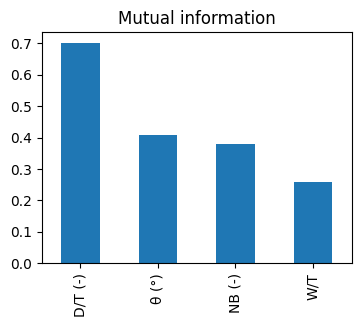

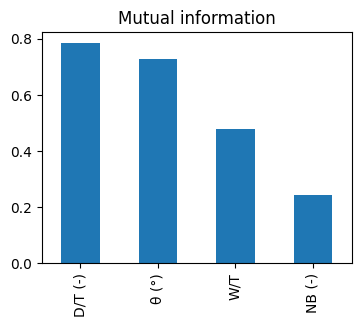

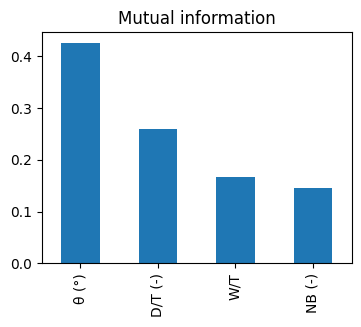

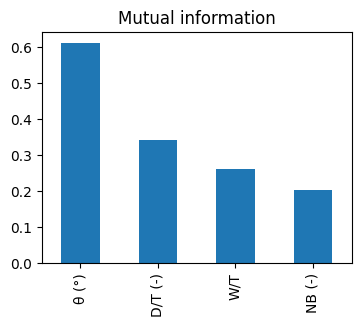

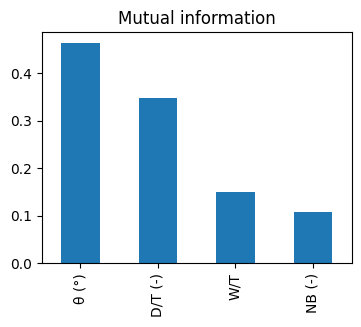

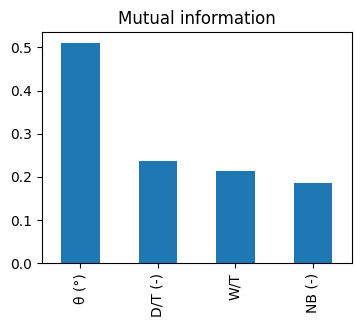

In [ ]:
for r in y_av:

  mutual_info = mutual_info_regression(x, y[r])

  mutual_info_series = pd.Series(mutual_info, index=x.columns)
  mutual_info_series = mutual_info_series.sort_values(ascending=False)

  plt.figure(figsize=(4,3))
  mutual_info_series.plot(kind='bar')
  plt.title('Mutual information')
  plt.show()

Nesta ocasião, também averiguou-se a predominância das duas features abordadas anteriormente, com algumas aparições das outras duas para alguns targets.



*   Análise de correlação



A análise de correlação utilizando heatmaps é crucial na seleção de features porque ajuda a identificar relações fortes entre variáveis, facilitando a detecção de redundâncias e colinearidades. Aplicando-se a análise de correlação, tem-se que:

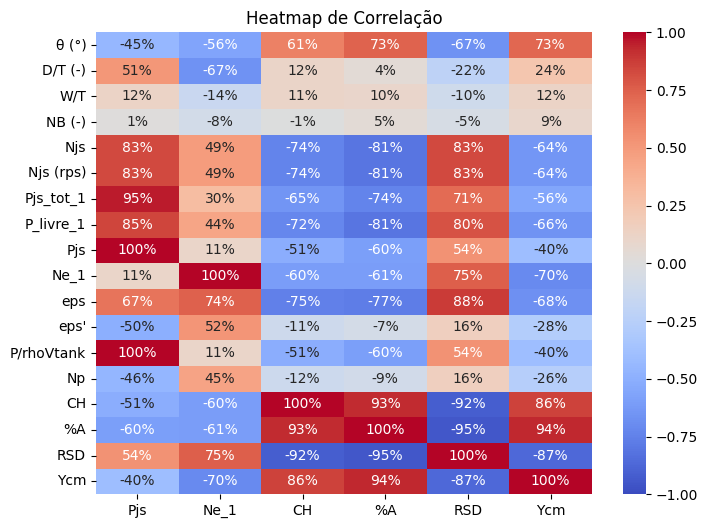

In [ ]:
df_combined = pd.concat([x, y], axis=1)

correlation_matrix = df_combined.corr()
correlation_matrix = correlation_matrix[y_av]

plt.figure(figsize=(8, 6))

def fmt_percent_bold(val):
    return f'{val * 100:.0f}%'

sns.heatmap(correlation_matrix, annot=correlation_matrix.applymap(fmt_percent_bold), fmt='', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de Correlação')
plt.show()

Comparando as variáveis de entrada no eixo y com as de saída no eixo x, o padrão percebido nas análises anteriores também foi constatado nesta situação.

Entretanto, tendo em vista que o dataset é muito pequeno, o que não prejudicará o tempo computacional de processamento, é cabível o uso de todas as features nele presentes.

**DIVIDINDO DADOS DE TREINO E TESTE**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [ ]:
x_train

,θ (°),D/T (-),W/T,NB (-)
61,30,0.6,0.12,5
55,30,0.4,0.08,5
40,60,0.6,0.08,5
9,60,0.4,0.08,5
64,60,0.4,0.12,3
...,...,...,...,...
20,45,0.5,0.06,4
60,30,0.6,0.12,3
71,75,0.5,0.10,4
14,60,0.6,0.12,3


In [ ]:
y_train

,Njs,Njs (rps),Pjs_tot_1,P_livre_1,Pjs,Ne_1,eps,eps',P/rhoVtank,Np,CH,%A,RSD,Ycm
61,1127,18.783333,86.7,55.5,31.2,774,775.103393,20.464354,20.548893,1.883444,0.6885,46.6158,0.6281,0.3613
55,832,13.866667,57.0,42.9,14.1,1549,1101.462921,162.626974,9.286519,16.064799,0.8787,64.0368,0.5513,0.3763
40,670,11.166667,56.4,37.0,19.4,585,450.408170,56.596818,12.777196,5.573746,1.0000,74.2669,0.2864,0.4610
9,568,9.466667,43.5,33.8,9.7,1082,506.709192,235.129139,6.388598,34.733847,1.0000,75.2645,0.3909,0.4421
64,602,10.033333,44.4,34.4,10.0,1056,357.686872,139.413941,6.586184,30.077150,0.9980,77.6160,0.3588,0.4415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,690,11.500000,45.5,37.0,8.5,921,420.494027,69.660279,5.598256,5.563496,0.9848,74.7487,0.3473,0.4436
60,1030,17.166667,71.7,52.3,19.4,752,481.955315,16.668835,12.777196,1.534122,0.8092,48.5409,0.6660,0.3497
71,550,9.166667,40.8,31.1,9.7,387,244.779163,80.068009,6.388598,12.536022,1.0000,84.0815,0.2220,0.4918
14,730,12.166667,62.3,40.0,22.3,524,354.507433,34.440300,14.687189,4.953431,1.0000,71.0914,0.2731,0.4606


In [ ]:
x_test
x_test_df = x_test
x_test_df = x_test_df.reset_index(drop=True)

x_test_df

,θ (°),D/T (-),W/T,NB (-)
0,30,0.4,0.12,5
1,30,0.4,0.08,3
2,45,0.5,0.10,2
3,30,0.6,0.08,3
4,45,0.3,0.10,4
5,30,0.4,0.08,5
6,60,0.4,0.12,3
7,15,0.5,0.10,4
8,30,0.6,0.08,3
9,60,0.6,0.08,3


In [ ]:
y_test

,Njs,Njs (rps),Pjs_tot_1,P_livre_1,Pjs,Ne_1,eps,eps',P/rhoVtank,Np,CH,%A,RSD,Ycm
30,918,15.300000,63.5,47.3,16.2,1350,905.529444,99.533027,10.669617,13.740835,0.8105,67.6367,0.4701,0.4023
0,900,15.000000,61.7,45.8,15.9,1661,1242.075209,144.881537,10.472032,14.311849,0.8151,57.0445,0.7021,0.3554
22,770,12.833333,57.3,40.8,16.5,955,524.486042,62.522223,10.867203,7.771196,0.9007,69.6521,0.4360,0.4250
31,1025,17.083333,71.1,50.5,20.6,743,715.213118,25.100018,13.567538,1.652972,0.9916,59.1202,0.5116,0.4093
18,600,10.000000,40.2,33.5,6.7,1786,591.592000,414.036561,4.412743,85.771082,0.6093,40.7077,0.9913,0.2911
28,856,14.266667,57.3,43.2,14.1,1491,1101.462921,149.328006,9.286519,14.751085,0.8787,62.7572,0.5300,0.3708
10,636,10.600000,47.0,35.2,11.8,1030,422.070509,139.510322,7.771697,30.097943,1.0000,77.6392,0.3124,0.4578
70,2060,34.333333,120.5,79.4,41.1,2074,2765.503532,17.216514,27.069214,1.010919,0.2821,18.8774,1.7580,0.2959
4,1030,17.166667,72.3,50.5,21.8,753,756.876018,26.177202,14.357880,1.723910,0.8637,57.9608,0.5098,0.3816
12,765,12.750000,61.4,40.8,20.6,750,478.268470,40.373612,13.567538,3.976059,1.0000,79.2492,0.2058,0.4861


**ESCALONAMENTO DOS DADOS**

Para realizar o escalonamento dos dados, é importante, inicialmente, averiguar a distribuição destes em cada feature. Ademais, é crucial a verificação da presença ou não de outliers. Sendo assim:

In [ ]:
param_norm = ["θ (°)",	"D/T (-)",	"W/T",	"NB (-)"]

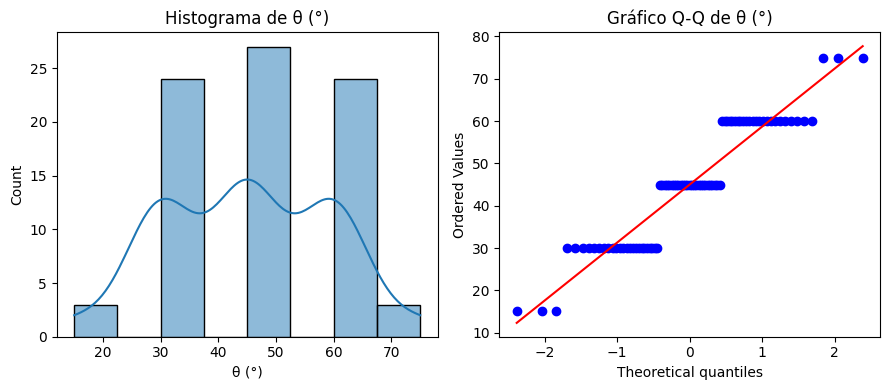

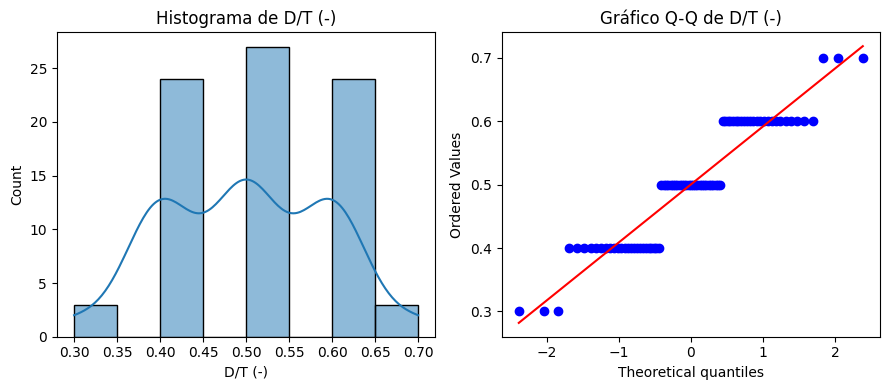

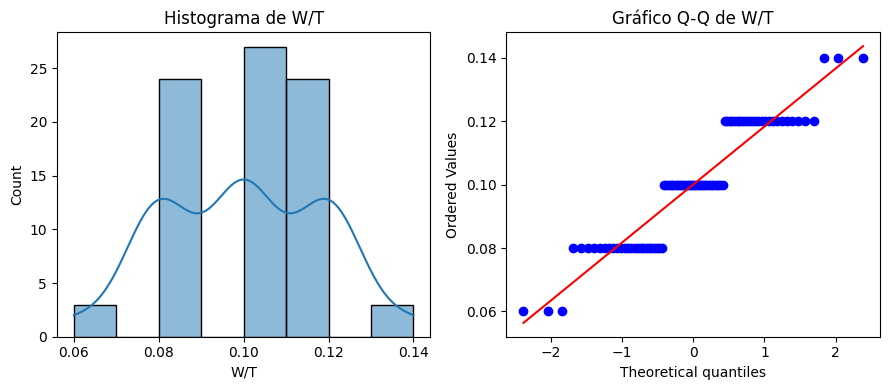

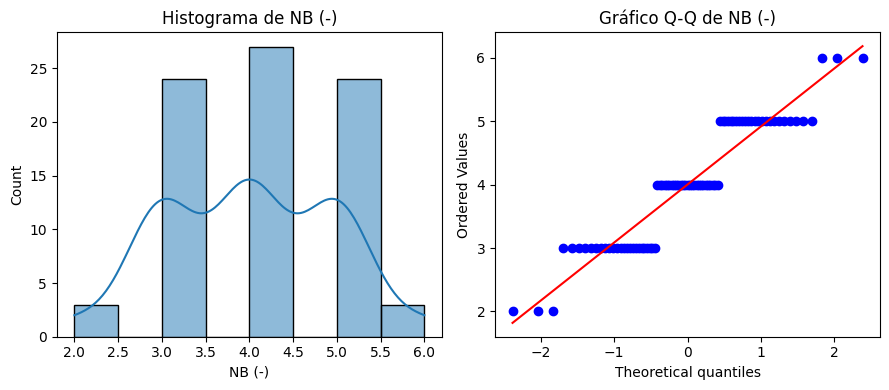

In [ ]:
hist_mec (x, param_norm)

In [ ]:
df_x_train = pd.DataFrame(x_train)

z_scores = df_x_train.apply(zscore)

outliers = (z_scores > 3) | (z_scores < -3)

outliers_x_train = df_x_train[outliers.any(axis=1)]

print(f"Z-Scores: {z_scores}")

print(f"\nOutliers encontrados: {outliers_x_train}")

Z-Scores:        θ (°)   D/T (-)       W/T    NB (-)
61 -1.110667  1.125179  0.977408  0.955835
55 -1.110667 -1.160899 -1.073547  0.955835
40  1.011204  1.125179 -1.073547  0.955835
9   1.011204 -1.160899 -1.073547  0.955835
64  1.011204 -1.160899  0.977408 -1.268654
..       ...       ...       ...       ...
20 -0.049731 -0.017860 -2.099025 -0.156409
60 -1.110667  1.125179  0.977408 -1.268654
71  2.072139 -0.017860 -0.048069 -0.156409
14  1.011204  1.125179  0.977408 -1.268654
51 -0.049731 -0.017860 -0.048069 -0.156409

[64 rows x 4 columns]

Outliers encontrados: Empty DataFrame
Columns: [θ (°), D/T (-), W/T, NB (-)]
Index: []


Constatou-se que os histogramas para as variáveis elencadas se comportam de forma aproximada à uma distribuição normal. Ademais, não foi observada a presença de outiliers. Logo, é viável o escalonamento via StandardScaler.

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-1.11066676,  1.12517941,  0.97740848,  0.95583537],
       [-1.11066676, -1.16089939, -1.07354702,  0.95583537],
       [ 1.01120407,  1.12517941, -1.07354702,  0.95583537],
       [ 1.01120407, -1.16089939, -1.07354702,  0.95583537],
       [ 1.01120407, -1.16089939,  0.97740848, -1.26865422],
       [-1.11066676,  1.12517941, -1.07354702,  0.95583537],
       [-0.04973135, -0.01785999, -2.09902478, -0.15640942],
       [-1.11066676,  1.12517941,  0.97740848,  0.95583537],
       [ 1.01120407, -1.16089939, -1.07354702, -1.26865422],
       [ 1.01120407,  1.12517941,  0.97740848,  0.95583537],
       [-1.11066676, -1.16089939, -1.07354702, -1.26865422],
       [-2.17160217, -0.01785999, -0.04806927, -0.15640942],
       [ 1.01120407,  1.12517941, -1.07354702, -1.26865422],
       [-1.11066676, -1.16089939,  0.97740848, -1.26865422],
       [-0.04973135, -0.01785999, -0.04806927, -0.15640942],
       [-1.11066676,  1.12517941,  0.97740848,  0.95583537],
       [-0.04973135, -0.

In [ ]:
x_test

array([[-1.11066676, -1.16089939,  0.97740848,  0.95583537],
       [-1.11066676, -1.16089939, -1.07354702, -1.26865422],
       [-0.04973135, -0.01785999, -0.04806927, -2.38089902],
       [-1.11066676,  1.12517941, -1.07354702, -1.26865422],
       [-0.04973135, -2.3039388 , -0.04806927, -0.15640942],
       [-1.11066676, -1.16089939, -1.07354702,  0.95583537],
       [ 1.01120407, -1.16089939,  0.97740848, -1.26865422],
       [-2.17160217, -0.01785999, -0.04806927, -0.15640942],
       [-1.11066676,  1.12517941, -1.07354702, -1.26865422],
       [ 1.01120407,  1.12517941, -1.07354702, -1.26865422],
       [-0.04973135, -0.01785999, -0.04806927, -2.38089902],
       [-1.11066676,  1.12517941,  0.97740848, -1.26865422],
       [ 1.01120407,  1.12517941, -1.07354702,  0.95583537],
       [ 1.01120407, -1.16089939, -1.07354702, -1.26865422],
       [ 1.01120407,  1.12517941,  0.97740848, -1.26865422],
       [-0.04973135, -2.3039388 , -0.04806927, -0.15640942],
       [-0.04973135,  2.

**FUNÇÕES DOS MODELOS PREDITIVOS**



*   Para escolha dos hiperparâmetros



In [ ]:
def train_test_hp(criterion, min_samp_split, list_ReturnAccuracy, x_train, y_train, x_test, y_test):

    rf = RandomForestRegressor(n_estimators=100, criterion = criterion, min_samples_split = min_samp_split)

    rf.fit(x_train, y_train)

    y_pred = rf.predict(x_test)

    r2 = r2_score(y_test, y_pred)

    list_ReturnR2.append(r2)



*   Hiperparâmetros a serem avaliados



In [ ]:
criterion = ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']

min_samples_split = [2,3,4,5,6]



*   Para treino e teste



In [ ]:
def train_test(criterion, min_samp_split, x_train, y_train, x_test, y_test, new_database, av, df_pred_2):

    rf = RandomForestRegressor(n_estimators=100, criterion = criterion, min_samples_split = min_samp_split)

    rf.fit(x_train, y_train)

    y_pred = rf.predict(x_test)

    r2 = r2_score(y_test, y_pred) * 100

    print("R2 (%): ", (r2))

    y_pred_2 = rf.predict(new_database)

    df_pred_2[av] = y_pred_2

    return y_pred

**BASE DE DADOS MAIS AMPLA PARA A SEGUNDA PREDIÇÃO**

Na segunda predição, será testado um banco de dados de entrada mais amplo, porém no mesmo intervalo da primeira predição.

In [ ]:
theta = np.linspace(15, 75, 15)
d_t = np.linspace(0.3, 0.7, 15)
w_t = np.linspace(0.06, 0.14, 15)
nb = np.linspace(2, 6, 5)

In [ ]:
combinacoes = list(itertools.product(theta, d_t, w_t, nb))
colunas = ['θ (°)', 'D/T (-)', 'W/T', 'NB (-)']

new_predict_df = pd.DataFrame(combinacoes, columns=colunas)

new_predict_df

,θ (°),D/T (-),W/T,NB (-)
0,15.0,0.3,0.06,2.0
1,15.0,0.3,0.06,3.0
2,15.0,0.3,0.06,4.0
3,15.0,0.3,0.06,5.0
4,15.0,0.3,0.06,6.0
...,...,...,...,...
16870,75.0,0.7,0.14,2.0
16871,75.0,0.7,0.14,3.0
16872,75.0,0.7,0.14,4.0
16873,75.0,0.7,0.14,5.0


In [ ]:
df_pred_2 = new_predict_df

df_pred_2

,θ (°),D/T (-),W/T,NB (-)
0,15.0,0.3,0.06,2.0
1,15.0,0.3,0.06,3.0
2,15.0,0.3,0.06,4.0
3,15.0,0.3,0.06,5.0
4,15.0,0.3,0.06,6.0
...,...,...,...,...
16870,75.0,0.7,0.14,2.0
16871,75.0,0.7,0.14,3.0
16872,75.0,0.7,0.14,4.0
16873,75.0,0.7,0.14,5.0




*   Escalonamento



In [ ]:
new_predict_df = sc.transform(new_predict_df)

In [ ]:
new_predict_df

array([[-2.17160217, -2.3039388 , -2.09902478, -2.38089902],
       [-2.17160217, -2.3039388 , -2.09902478, -1.26865422],
       [-2.17160217, -2.3039388 , -2.09902478, -0.15640942],
       ...,
       [ 2.07213948,  2.26821881,  2.00288624, -0.15640942],
       [ 2.07213948,  2.26821881,  2.00288624,  0.95583537],
       [ 2.07213948,  2.26821881,  2.00288624,  2.06808017]])

**IMPLEMENTANDO O APRENDIZADO DE MÁQUINA**


*   Seleção dos hiperparâmetros do modelo preditivo:



In [ ]:
best_criterion_dict = {}
best_min_samp_split_dict = {}

In [ ]:
for p in y_av:

  list_ReturnR2 = []

  list_order_criterion = []

  list_order_min_samples_split = []

  for i in criterion:

    for j in min_samples_split:

      list_order_criterion.append(i)
      list_order_min_samples_split.append(j)

      train_test_hp(i, j, list_ReturnR2, x_train, y_train[p], x_test, y_test[p])

  data_df = {'MSP': list_order_min_samples_split, 'R2': list_ReturnR2}

  df_criterions = pd.DataFrame (data_df, index = list_order_criterion, columns = ['MSP', 'R2']).sort_values('R2', ascending=False)

  best_criterion_dict[p] = df_criterions.index[0]
  best_min_samp_split_dict[p] = df_criterions['MSP'][0]

  print(p)

  print(df_criterions)

Pjs
                MSP        R2
absolute_error    2  0.966391
absolute_error    3  0.959967
squared_error     3  0.959550
friedman_mse      2  0.957511
friedman_mse      3  0.955739
poisson           6  0.953486
absolute_error    4  0.952779
poisson           5  0.952492
poisson           3  0.952198
friedman_mse      5  0.952088
poisson           4  0.950305
friedman_mse      4  0.948172
poisson           2  0.947763
absolute_error    5  0.945601
squared_error     2  0.945382
squared_error     4  0.945282
friedman_mse      6  0.945270
squared_error     5  0.944036
absolute_error    6  0.940895
squared_error     6  0.939591
Ne_1
                MSP        R2
friedman_mse      3  0.982006
poisson           3  0.981089
absolute_error    2  0.979681
squared_error     2  0.979638
absolute_error    3  0.979040
poisson           2  0.976020
squared_error     3  0.975732
absolute_error    4  0.973095
friedman_mse      2  0.971895
squared_error     4  0.966839
absolute_error    5  0.965864
f



*   Treino e Predição:



Inserindo os melhores hiperparâmetros para as features avaliadas acima e realizando o treino e os testes das duas predições, tem-se que:

In [ ]:
best_criterion_dict

{'Pjs': 'absolute_error',
 'Ne_1': 'friedman_mse',
 'CH': 'poisson',
 '%A': 'poisson',
 'RSD': 'friedman_mse',
 'Ycm': 'absolute_error'}

In [ ]:
best_min_samp_split_dict

{'Pjs': 2, 'Ne_1': 3, 'CH': 2, '%A': 2, 'RSD': 2, 'Ycm': 3}

In [ ]:
predicoes = dict()

for av in y_av:

  pred = train_test(best_criterion_dict[av], best_min_samp_split_dict[av], x_train, y_train[av], x_test, y_test[av], new_predict_df, av, df_pred_2)

  predicoes[av] = pred

R2 (%):  95.6424262236609
R2 (%):  98.17118195690794
R2 (%):  66.96922394897287
R2 (%):  83.16836549080334
R2 (%):  91.90824835283776
R2 (%):  84.36214201284552


In [ ]:
df_predicoes = pd.DataFrame(predicoes)
df_predicoes

,Pjs,Ne_1,CH,%A,RSD,Ycm
0,16.2115,1348.464952,0.964549,67.076418,0.477151,0.391764
1,14.8370,1614.208833,0.734997,58.161415,0.639354,0.354545
2,15.4625,885.028785,0.952857,73.832379,0.327250,0.448181
3,20.9455,777.974167,0.685696,45.604803,0.687492,0.347973
4,8.3300,1673.220500,0.699147,53.974973,0.772693,0.331157
5,14.3190,1568.792000,0.770065,61.428590,0.595999,0.360524
6,10.2560,1037.037833,0.927010,74.281190,0.377813,0.439061
7,38.2440,1925.439429,0.330324,23.844819,1.597514,0.308431
8,20.9455,777.974167,0.685696,45.604803,0.687492,0.347973
9,19.3200,685.604833,0.988448,76.405035,0.251959,0.461211


In [ ]:
df_pred_2

,θ (°),D/T (-),W/T,NB (-),Pjs,Ne_1,CH,%A,RSD,Ycm
0,15.0,0.3,0.06,2.0,33.8775,1811.860833,0.428873,34.492786,1.591922,0.323523
1,15.0,0.3,0.06,3.0,33.8400,1811.860833,0.428873,34.492786,1.591922,0.323523
2,15.0,0.3,0.06,4.0,33.8400,1811.860833,0.417616,34.492786,1.591922,0.322204
3,15.0,0.3,0.06,5.0,33.6190,1790.555000,0.425307,35.915305,1.584879,0.326540
4,15.0,0.3,0.06,6.0,33.6190,1790.555000,0.425307,35.915305,1.584879,0.326540
...,...,...,...,...,...,...,...,...,...,...
16870,75.0,0.7,0.14,2.0,22.4475,495.199643,0.954545,78.416836,0.274795,0.469042
16871,75.0,0.7,0.14,3.0,22.4475,495.199643,0.979125,78.321365,0.235614,0.471624
16872,75.0,0.7,0.14,4.0,22.5120,415.290976,0.998661,81.997316,0.207319,0.479549
16873,75.0,0.7,0.14,5.0,23.7050,412.961198,0.998935,82.021392,0.197438,0.478748


Para que sejam encontrados os pontos ótimos para ambos os testes, será aplicada a função de desejabilidade.

**FUNÇÃO DE DESEJABILIDADE - PREDIÇÃO 1**

In [ ]:
desejabilidade = np.zeros(len(df_predicoes['Pjs']))
d_Pjs = d_Ne = d_CH = d_A = d_RSD = d_Ycm = desejabilidade

In [ ]:
df_predicoes.insert(6, "DESEJABILIDADE Pjs", d_Pjs)
df_predicoes.insert(7, "DESEJABILIDADE Ne", d_Ne)
df_predicoes.insert(8, "DESEJABILIDADE CH", d_CH)
df_predicoes.insert(9, "DESEJABILIDADE A", d_A)
df_predicoes.insert(10, "DESEJABILIDADE RSD", d_RSD)
df_predicoes.insert(11, "DESEJABILIDADE Ycm", d_Ycm)
df_predicoes.insert(12, "DESEJABILIDADE TOTAL", desejabilidade)

In [ ]:
for k in df_predicoes.index:

    df_predicoes['DESEJABILIDADE Pjs'][k] = (max(df_predicoes['Pjs'])-(df_predicoes['Pjs'][k]))/(max(df_predicoes['Pjs'])-min(df_predicoes['Pjs']))
    df_predicoes['DESEJABILIDADE Ne'][k] = (-min(df_predicoes['Ne_1'])+(df_predicoes['Ne_1'][k]))/(max(df_predicoes['Ne_1'])-min(df_predicoes['Ne_1']))
    df_predicoes['DESEJABILIDADE CH'][k] = (-min(df_predicoes['CH'])+(df_predicoes['CH'][k]))/(max(df_predicoes['CH'])-min(df_predicoes['CH']))
    df_predicoes['DESEJABILIDADE A'][k] = (-min(df_predicoes['%A'])+(df_predicoes['%A'][k]))/(max(df_predicoes['%A'])-min(df_predicoes['%A']))
    df_predicoes['DESEJABILIDADE RSD'][k] = (max(df_predicoes['RSD'])-(df_predicoes['RSD'][k]))/(max(df_predicoes['RSD'])-min(df_predicoes['RSD']))
    df_predicoes['DESEJABILIDADE Ycm'][k] = (-min(df_predicoes['Ycm'])+(df_predicoes['Ycm'][k]))/(max(df_predicoes['Ycm'])-min(df_predicoes['Ycm']))
    df_predicoes['DESEJABILIDADE TOTAL'][k] = df_predicoes['DESEJABILIDADE Pjs'][k]*df_predicoes['DESEJABILIDADE Ne'][k]*df_predicoes['DESEJABILIDADE CH'][k]*df_predicoes['DESEJABILIDADE A'][k]*df_predicoes['DESEJABILIDADE RSD'][k]*df_predicoes['DESEJABILIDADE Ycm'][k]

In [ ]:
df_predicoes

,Pjs,Ne_1,CH,%A,RSD,Ycm,DESEJABILIDADE Pjs,DESEJABILIDADE Ne,DESEJABILIDADE CH,DESEJABILIDADE A,DESEJABILIDADE RSD,DESEJABILIDADE Ycm,DESEJABILIDADE TOTAL
0,16.2115,1348.464952,0.964549,67.076418,0.477151,0.391764,0.736528,0.593704,0.947225,0.822516,0.818417,0.515153,0.143638
1,14.8370,1614.208833,0.734997,58.161415,0.639354,0.354545,0.782476,0.780837,0.604386,0.652901,0.699929,0.285067,0.048105
2,15.4625,885.028785,0.952857,73.832379,0.327250,0.448181,0.761566,0.267361,0.929763,0.951053,0.927919,0.863912,0.144332
3,20.9455,777.974167,0.685696,45.604803,0.687492,0.347973,0.578274,0.191975,0.530754,0.414001,0.664765,0.244443,0.003964
4,8.3300,1673.220500,0.699147,53.974973,0.772693,0.331157,1.000000,0.822392,0.550843,0.573250,0.602526,0.140489,0.021982
5,14.3190,1568.792000,0.770065,61.428590,0.595999,0.360524,0.799793,0.748855,0.656760,0.715061,0.731600,0.322029,0.066266
6,10.2560,1037.037833,0.927010,74.281190,0.377813,0.439061,0.935615,0.374403,0.891160,0.959592,0.890983,0.807531,0.215530
7,38.2440,1925.439429,0.330324,23.844819,1.597514,0.308431,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,20.9455,777.974167,0.685696,45.604803,0.687492,0.347973,0.578274,0.191975,0.530754,0.414001,0.664765,0.244443,0.003964
9,19.3200,685.604833,0.988448,76.405035,0.251959,0.461211,0.632613,0.126930,0.982920,1.000000,0.982918,0.944465,0.073270


In [ ]:
df_geral = pd.concat([x_test_df, df_predicoes], axis=1)

In [ ]:
df_geral

,θ (°),D/T (-),W/T,NB (-),Pjs,Ne_1,CH,%A,RSD,Ycm,DESEJABILIDADE Pjs,DESEJABILIDADE Ne,DESEJABILIDADE CH,DESEJABILIDADE A,DESEJABILIDADE RSD,DESEJABILIDADE Ycm,DESEJABILIDADE TOTAL
0,30,0.4,0.12,5,16.2115,1348.464952,0.964549,67.076418,0.477151,0.391764,0.736528,0.593704,0.947225,0.822516,0.818417,0.515153,0.143638
1,30,0.4,0.08,3,14.8370,1614.208833,0.734997,58.161415,0.639354,0.354545,0.782476,0.780837,0.604386,0.652901,0.699929,0.285067,0.048105
2,45,0.5,0.10,2,15.4625,885.028785,0.952857,73.832379,0.327250,0.448181,0.761566,0.267361,0.929763,0.951053,0.927919,0.863912,0.144332
3,30,0.6,0.08,3,20.9455,777.974167,0.685696,45.604803,0.687492,0.347973,0.578274,0.191975,0.530754,0.414001,0.664765,0.244443,0.003964
4,45,0.3,0.10,4,8.3300,1673.220500,0.699147,53.974973,0.772693,0.331157,1.000000,0.822392,0.550843,0.573250,0.602526,0.140489,0.021982
5,30,0.4,0.08,5,14.3190,1568.792000,0.770065,61.428590,0.595999,0.360524,0.799793,0.748855,0.656760,0.715061,0.731600,0.322029,0.066266
6,60,0.4,0.12,3,10.2560,1037.037833,0.927010,74.281190,0.377813,0.439061,0.935615,0.374403,0.891160,0.959592,0.890983,0.807531,0.215530
7,15,0.5,0.10,4,38.2440,1925.439429,0.330324,23.844819,1.597514,0.308431,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,30,0.6,0.08,3,20.9455,777.974167,0.685696,45.604803,0.687492,0.347973,0.578274,0.191975,0.530754,0.414001,0.664765,0.244443,0.003964
9,60,0.6,0.08,3,19.3200,685.604833,0.988448,76.405035,0.251959,0.461211,0.632613,0.126930,0.982920,1.000000,0.982918,0.944465,0.073270


A condição operacional ótima é dada por:

In [ ]:
maior_desejabilidade = max(df_geral['DESEJABILIDADE TOTAL'])
melhor_resultado = df_geral.loc[df_predicoes['DESEJABILIDADE TOTAL'] == maior_desejabilidade]

melhor_resultado

,θ (°),D/T (-),W/T,NB (-),Pjs,Ne_1,CH,%A,RSD,Ycm,DESEJABILIDADE Pjs,DESEJABILIDADE Ne,DESEJABILIDADE CH,DESEJABILIDADE A,DESEJABILIDADE RSD,DESEJABILIDADE Ycm,DESEJABILIDADE TOTAL
6,60,0.4,0.12,3,10.256,1037.037833,0.92701,74.28119,0.377813,0.439061,0.935615,0.374403,0.89116,0.959592,0.890983,0.807531,0.21553


**FUNÇÃO DE DESEJABILIDADE - PREDIÇÃO 2**

In [ ]:
desejabilidade = np.zeros(len(df_pred_2['Pjs']))
d_Njs = d_Pjs = d_Ne = d_eps = d_Np = d_CH = d_A = d_RSD = d_Ycm = desejabilidade

In [ ]:
df_pred_2.insert(10, "DESEJABILIDADE Pjs", d_Pjs)
df_pred_2.insert(11, "DESEJABILIDADE Ne", d_Ne)
df_pred_2.insert(12, "DESEJABILIDADE CH", d_CH)
df_pred_2.insert(13, "DESEJABILIDADE A", d_A)
df_pred_2.insert(14, "DESEJABILIDADE RSD", d_RSD)
df_pred_2.insert(15, "DESEJABILIDADE Ycm", d_Ycm)
df_pred_2.insert(16, "DESEJABILIDADE TOTAL", desejabilidade)

In [ ]:
k = 0

for k in df_pred_2.index:

    df_pred_2['DESEJABILIDADE Pjs'][k] = (max(df_pred_2['Pjs'])-(df_pred_2['Pjs'][k]))/(max(df_pred_2['Pjs'])-min(df_pred_2['Pjs']))
    df_pred_2['DESEJABILIDADE Ne'][k] = (-min(df_pred_2['Ne_1'])+(df_pred_2['Ne_1'][k]))/(max(df_pred_2['Ne_1'])-min(df_pred_2['Ne_1']))
    df_pred_2['DESEJABILIDADE CH'][k] = (-min(df_pred_2['CH'])+(df_pred_2['CH'][k]))/(max(df_pred_2['CH'])-min(df_pred_2['CH']))
    df_pred_2['DESEJABILIDADE A'][k] = (-min(df_pred_2['%A'])+(df_pred_2['%A'][k]))/(max(df_pred_2['%A'])-min(df_pred_2['%A']))
    df_pred_2['DESEJABILIDADE RSD'][k] = (max(df_pred_2['RSD'])-(df_pred_2['RSD'][k]))/(max(df_pred_2['RSD'])-min(df_pred_2['RSD']))
    df_pred_2['DESEJABILIDADE Ycm'][k] = (-min(df_pred_2['Ycm'])+(df_pred_2['Ycm'][k]))/(max(df_pred_2['Ycm'])-min(df_pred_2['Ycm']))
    df_pred_2['DESEJABILIDADE TOTAL'][k] = df_pred_2['DESEJABILIDADE Pjs'][k]*df_pred_2['DESEJABILIDADE Ne'][k]*df_pred_2['DESEJABILIDADE CH'][k]*df_pred_2['DESEJABILIDADE A'][k]*df_pred_2['DESEJABILIDADE RSD'][k]*df_pred_2['DESEJABILIDADE Ycm'][k]

In [ ]:
df_pred_2

,θ (°),D/T (-),W/T,NB (-),Pjs,Ne_1,CH,%A,RSD,Ycm,DESEJABILIDADE Pjs,DESEJABILIDADE Ne,DESEJABILIDADE CH,DESEJABILIDADE A,DESEJABILIDADE RSD,DESEJABILIDADE Ycm,DESEJABILIDADE TOTAL
0,15.0,0.3,0.06,2.0,33.8775,1811.860833,0.428873,34.492786,1.591922,0.323523,0.147026,0.920605,0.186774,0.194797,0.013498,0.083923,0.000006
1,15.0,0.3,0.06,3.0,33.8400,1811.860833,0.428873,34.492786,1.591922,0.323523,0.148257,0.920605,0.186774,0.194797,0.013498,0.083923,0.000006
2,15.0,0.3,0.06,4.0,33.8400,1811.860833,0.417616,34.492786,1.591922,0.322204,0.148257,0.920605,0.170746,0.194797,0.013498,0.076746,0.000005
3,15.0,0.3,0.06,5.0,33.6190,1790.555000,0.425307,35.915305,1.584879,0.326540,0.155508,0.906734,0.181697,0.218103,0.018478,0.100335,0.000010
4,15.0,0.3,0.06,6.0,33.6190,1790.555000,0.425307,35.915305,1.584879,0.326540,0.155508,0.906734,0.181697,0.218103,0.018478,0.100335,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16870,75.0,0.7,0.14,2.0,22.4475,495.199643,0.954545,78.416836,0.274795,0.469042,0.522057,0.063396,0.935276,0.914430,0.944918,0.875671,0.023421
16871,75.0,0.7,0.14,3.0,22.4475,495.199643,0.979125,78.321365,0.235614,0.471624,0.522057,0.063396,0.970276,0.912865,0.972625,0.889719,0.025368
16872,75.0,0.7,0.14,4.0,22.5120,415.290976,0.998661,81.997316,0.207319,0.479549,0.519941,0.011371,0.998093,0.973091,0.992634,0.932838,0.005317
16873,75.0,0.7,0.14,5.0,23.7050,412.961198,0.998935,82.021392,0.197438,0.478748,0.480797,0.009855,0.998483,0.973485,0.999621,0.928477,0.004274


A condição operacional ótima é dada por:

In [ ]:
maior_desejabilidade = max(df_pred_2['DESEJABILIDADE TOTAL'])
melhor_resultado = df_pred_2.loc[df_pred_2['DESEJABILIDADE TOTAL'] == maior_desejabilidade]

melhor_resultado

,θ (°),D/T (-),W/T,NB (-),Pjs,Ne_1,CH,%A,RSD,Ycm,DESEJABILIDADE Pjs,DESEJABILIDADE Ne,DESEJABILIDADE CH,DESEJABILIDADE A,DESEJABILIDADE RSD,DESEJABILIDADE Ycm,DESEJABILIDADE TOTAL
6944,40.714286,0.357143,0.105714,6.0,11.343,1495.523667,0.970247,80.257938,0.273854,0.46369,0.886408,0.714655,0.957636,0.944593,0.945583,0.846546,0.458696
7019,40.714286,0.385714,0.105714,6.0,11.343,1495.523667,0.970247,80.257938,0.273854,0.46369,0.886408,0.714655,0.957636,0.944593,0.945583,0.846546,0.458696
7094,40.714286,0.414286,0.105714,6.0,11.343,1495.523667,0.970247,80.257938,0.273854,0.46369,0.886408,0.714655,0.957636,0.944593,0.945583,0.846546,0.458696
7169,40.714286,0.442857,0.105714,6.0,11.343,1495.523667,0.970247,80.257938,0.273854,0.46369,0.886408,0.714655,0.957636,0.944593,0.945583,0.846546,0.458696
8069,45.000000,0.357143,0.105714,6.0,11.343,1495.523667,0.970247,80.257938,0.273854,0.46369,0.886408,0.714655,0.957636,0.944593,0.945583,0.846546,0.458696
8144,45.000000,0.385714,0.105714,6.0,11.343,1495.523667,0.970247,80.257938,0.273854,0.46369,0.886408,0.714655,0.957636,0.944593,0.945583,0.846546,0.458696
8219,45.000000,0.414286,0.105714,6.0,11.343,1495.523667,0.970247,80.257938,0.273854,0.46369,0.886408,0.714655,0.957636,0.944593,0.945583,0.846546,0.458696
8294,45.000000,0.442857,0.105714,6.0,11.343,1495.523667,0.970247,80.257938,0.273854,0.46369,0.886408,0.714655,0.957636,0.944593,0.945583,0.846546,0.458696
